# Decision Tree

In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv.csv')

In [2]:
df

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no
...,...,...,...,...,...,...
1333,northwest,50,male,30.970,3,no
1334,northeast,18,female,31.920,0,no
1335,southeast,18,female,36.850,0,no
1336,southwest,21,female,25.800,0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


# Getting Featurs & Target

In [4]:
x = df.drop('smoker', axis='columns')

In [5]:
y = df['smoker']

In [6]:
x.head()

,region,age,sex,bmi,children
0,southwest,19,female,27.900,0
1,southeast,18,male,33.770,1
2,southeast,28,male,33.000,3
3,northwest,33,male,22.705,0
4,northwest,32,male,28.880,0


In [7]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

# Encoding

In [8]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])

In [9]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# Traing & Testing Process 70:30

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=.30, random_state=42)

# Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

### Fitting the model

In [12]:
clf.fit(x_train,y_train)  # fitting the model by x & y trained data

DecisionTreeClassifier()

### Testing the model

In [13]:
pred = clf.predict(x_test)
pred

array(['no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', '

In [14]:
df_pred = pd.DataFrame(pred, columns=["Prediction_Smoker_Yes or No"])
df_pred.head()

,Prediction_Smoker_Yes or No
0,no
1,yes
2,no
3,no
4,no


# Performance Evaluation

In [15]:
clf.score(x_test,y_test)  # Performane evaluation by Test Value

0.6741293532338308

# Tree Visualization

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(300.2997659841037, 213.0912, 'X[3] <= 40.532\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(275.71699877106744, 204.3936, 'X[3] <= 37.085\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(246.72837956460674, 195.696, 'X[3] <= 37.06\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(245.36045310903984, 186.9984, 'X[3] <= 34.102\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(213.88678977272727, 178.3008, 'X[3] <= 32.933\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(192.8322108018386, 169.60320000000002, 'X[3] <= 32.425\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(172.60987614913176, 160.9056, 'X[3] <= 31.808\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(143.1086184882533, 152.208, 'X[4] <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(102.78684882533197, 143.5104, 'X[1] <= 47.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(46.55224719101124, 134.81279999999998, 'X[0] <= 0.5\ngini = 0.

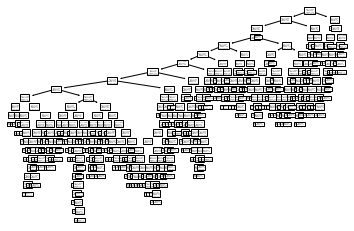

In [17]:
tree.plot_tree(clf)   

In [18]:
x_features = x.columns

[Text(600.5995319682074, 745.8191999999999, 'bmi <= 40.532\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(551.4339975421349, 715.3775999999999, 'bmi <= 37.085\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(493.4567591292135, 684.9359999999999, 'bmi <= 37.06\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(490.7209062180797, 654.4943999999999, 'bmi <= 34.102\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(427.77357954545454, 624.0527999999999, 'bmi <= 32.933\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(385.6644216036772, 593.6111999999999, 'bmi <= 32.425\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(345.21975229826353, 563.1696, 'bmi <= 31.808\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(286.2172369765066, 532.728, 'children <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(205.57369765066395, 502.28639999999996, 'age <= 47.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(93.10449438202

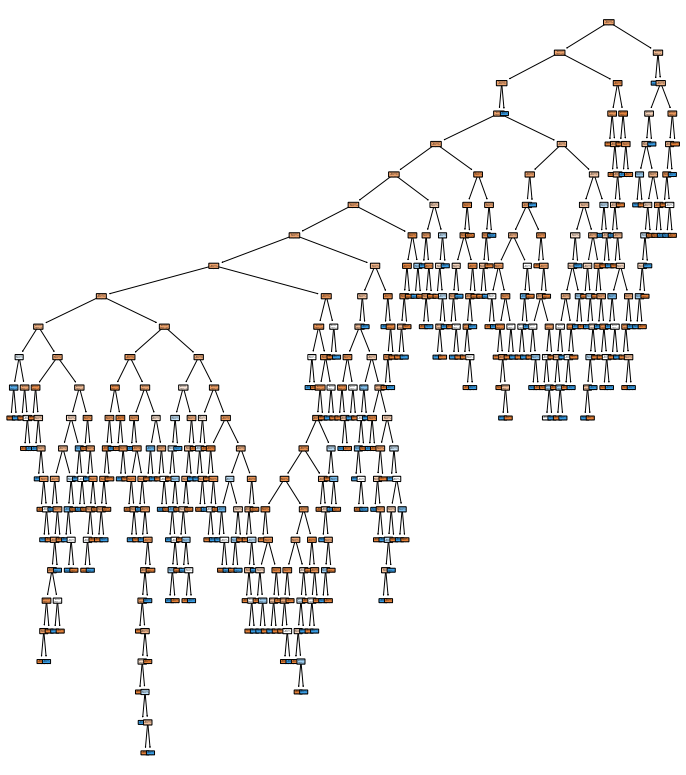

In [19]:
plt.figure(figsize=(12,14))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x_features)

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split (df.drop('smoker', axis = 1), df['smoker'],train_size=.70, random_state=1)

In [24]:
xtrain.head()

,region,age,sex,bmi,children
744,northwest,50,male,26.41,0
363,southwest,21,female,26.40,1
10,northeast,25,male,26.22,0
970,southeast,50,female,28.16,3
634,southwest,51,male,39.70,1


In [25]:
ytrain.head()

744    no
363    no
10     no
970    no
634    no
Name: smoker, dtype: object

In [26]:
ytrain.value_counts()

no     743
yes    193
Name: smoker, dtype: int64

In [27]:
# Getting actual results, np for actual results
import numpy as np
np.array (ytest) # actual result

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [33]:
classification_report (ytest,pred)

'              precision    recall  f1-score   support\n\n          no       0.79      0.75      0.77       321\n         yes       0.18      0.21      0.19        81\n\n    accuracy                           0.64       402\n   macro avg       0.48      0.48      0.48       402\nweighted avg       0.67      0.64      0.66       402\n'

In [34]:
print(classification_report (ytest,pred))

              precision    recall  f1-score   support

          no       0.79      0.75      0.77       321
         yes       0.18      0.21      0.19        81

    accuracy                           0.64       402
   macro avg       0.48      0.48      0.48       402
weighted avg       0.67      0.64      0.66       402



In [35]:
xtest.shape 

(402, 5)

In [36]:
confusion_matrix (ytest, pred)

array([[242,  79],
       [ 64,  17]], dtype=int64)

In [37]:
con_mat = confusion_matrix (ytest, pred)

In [38]:
con_mat

array([[242,  79],
       [ 64,  17]], dtype=int64)

In [39]:
# Accuracy True Result / Total   
(242+17) / (242+17+64+79)

0.6442786069651741

In [40]:
import seaborn as sns

<AxesSubplot:>

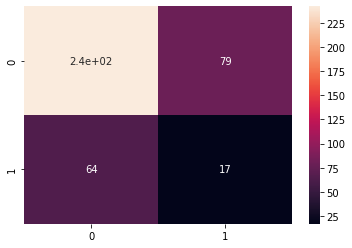

In [41]:
sns.heatmap(con_mat, annot=True)

In [42]:
tp,fn,fp,tn=confusion_matrix(ytest ,pred).reshape(-1)

In [43]:
tp

242

In [44]:
fn

79

In [45]:
fp

64

In [46]:
tn

17

In [47]:
(tp+tn) / (tp+tn+fp+fn)  # Model Accuray 

0.6442786069651741